# Useful libraries

In [168]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

In [169]:
data_path = "/Users/marcelgrossmann/Documents/Project/MLCoursera/Dataset/drug200.csv"


In [170]:
dataset = pd.read_csv(data_path)

### Explore dataset

In [171]:
dataset.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [172]:
dataset.sample(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
159,34,F,LOW,NORMAL,12.923,drugX
77,26,F,HIGH,NORMAL,19.161,DrugY
28,39,F,LOW,NORMAL,22.697,DrugY
94,56,M,LOW,HIGH,15.015,DrugY
29,45,M,LOW,HIGH,17.951,DrugY


In [173]:
dataset.dtypes.value_counts()

object     4
int64      1
float64    1
Name: count, dtype: int64

In [174]:
dataset.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [175]:
dataset.BP.value_counts()
dataset.Cholesterol.value_counts()

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

In [176]:
dataset.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

<Axes: title={'center': 'Distribution of target variable'}, xlabel='Drug'>

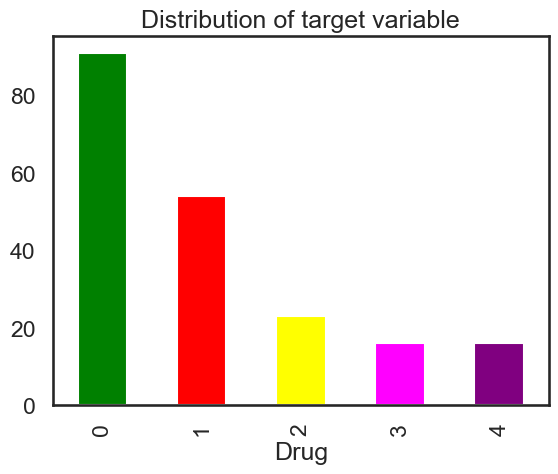

In [177]:
plt.title("Distribution of target variable")
y_data.value_counts().plot.bar(color=['green', 'red', 'yellow', 'magenta','purple'])

In [178]:
dataset.replace({"F":0,"M":1,"BP":0,"LOW":0,"NORMAL":1,"HIGH":2, "NORMAL":0, "HIGH":1,"DrugY":0,"drugX":1, "drugA":2, "drugC":3, "drugB":4},inplace=True)

In [179]:
feature_cols = dataset.columns[:-1]
feature_cols
corr_values = dataset[feature_cols].corr()

tril_index = np.tril_indices_from(corr_values)

for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
    
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

Text(0.5, 1.0, 'Absolute correlation between features')

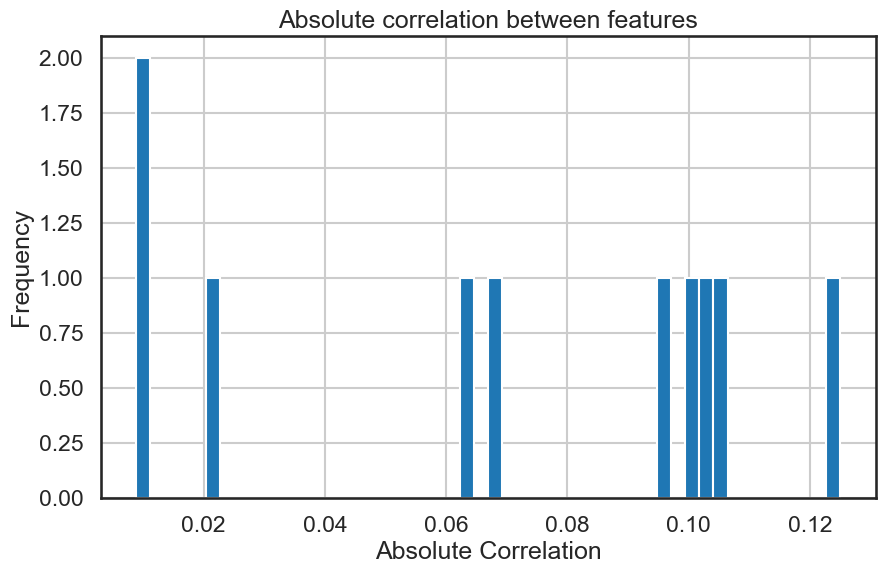

In [186]:
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=50, figsize=(10, 6))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');
plt.title("Absolute correlation between features")

In [181]:
dataset['Age'] = dataset["Age"].apply(lambda r:(r - X_train['Age'].min())/X_train['Age'].max())
dataset['Na_to_K'] = dataset['Na_to_K'].apply(lambda r: (r - X_train['Na_to_K'].min())/X_train['Na_to_K'].max())

In [182]:
from sklearn.model_selection import StratifiedShuffleSplit
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(dataset[feature_cols], dataset.Drug))
X_train = dataset.loc[train_idx, feature_cols]
y_train = dataset.loc[train_idx, 'Drug']

X_test  = dataset.loc[test_idx, feature_cols]
y_test  = dataset.loc[test_idx, 'Drug']

In [183]:
X_test

,Age,Sex,BP,Cholesterol,Na_to_K
191,23.0,1,1,1,8.011
102,28.0,0,0,1,13.127
184,18.0,0,1,1,37.188
61,24.0,1,1,0,9.475
175,73.0,0,1,1,18.348
80,60.0,1,1,1,13.934
97,56.0,0,1,1,25.395
137,35.0,0,1,1,12.894
54,68.0,0,1,0,10.189
24,33.0,0,0,1,33.486


### Models.

In [119]:
simple_lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [121]:
LogisticCV_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [122]:
LogisticCV_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)

In [147]:
coefficients = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [simple_lr, LogisticCV_l1, LogisticCV_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    coeffs = mod.coef_
    coeff_label = pd.MultiIndex(levels=[[lab], [0,1,2,3,4]], 
                                 codes=[[0,0,0,0,0], [0,1,2,3,4]])
    coefficients.append(pd.DataFrame(coeffs.T, columns=coeff_label))

coefficients = pd.concat(coefficients, axis=1)

coefficients.sample(5).T

1         3          0           4          2
lr 0 -0.047660 -0.093924  -0.377475    4.968438   0.169973
   1 -0.193154 -0.737830  -0.177287   -2.890744  -2.755961
   2 -0.059932 -0.056174  -1.411975   -2.159649   2.006976
   3 -0.126567  1.207218  -0.447971   -1.619606  -1.538068
   4 -0.205686 -0.550248   1.108405   -1.771007   1.451990
l1 0  0.398719  0.000000   0.000000   29.653695   0.000000
   1 -0.675288 -1.840744  -0.029407  -11.238623  -6.031212
   2  0.861730  3.463752 -16.713310  -36.708394  15.724958
   3  0.000000  0.000000   0.000000    0.000000   0.000000
   4 -2.998494 -0.671587  15.605946  -15.713127   9.115361
l2 0  1.169030  1.586251  -2.099999  151.785532   0.373417
   1 -0.821551 -1.991495  -0.748424  -10.926470  -6.325284
   2  0.619866  2.578854 -12.183285  -25.085433  12.148888
   3 -0.003076 -0.002229  -0.002353   -0.001996  -0.002782
   4 -2.636389 -0.750874  13.976395  -13.473331   8.271803

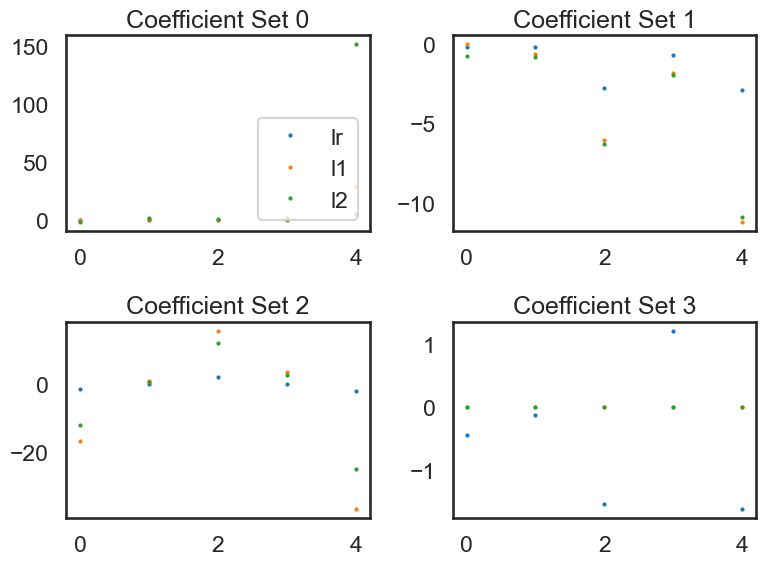

In [157]:
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(8,6)

for ax in enumerate(axList):
    loc = ax[0]
    ax = ax[1]
    
    data = coefficients.xs(loc, level=1, axis=1)
    data.plot(marker='o', ls='', ms=2.0, ax=ax, legend=False)
    
    if ax is axList[0]:
        ax.legend(loc=4)
        
    ax.set(title='Coefficient Set '+str(loc))

plt.tight_layout()

In [131]:
y_test.value_counts()

Drug
0    27
1    16
2     7
3     5
4     5
Name: count, dtype: int64

In [187]:
X_test

,Age,Sex,BP,Cholesterol,Na_to_K
191,23.0,1,1,1,8.011
102,28.0,0,0,1,13.127
184,18.0,0,1,1,37.188
61,24.0,1,1,0,9.475
175,73.0,0,1,1,18.348
80,60.0,1,1,1,13.934
97,56.0,0,1,1,25.395
137,35.0,0,1,1,12.894
54,68.0,0,1,0,10.189
24,33.0,0,0,1,33.486


In [200]:
y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [simple_lr, LogisticCV_l1, LogisticCV_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.sample(5)

,lr,l1,l2
25,0,4,0
49,0,0,0
58,0,0,0
6,0,0,0
35,0,4,0


In [195]:
metrics = list()
cm = dict()

for lab in coeff_labels:
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3,4]),
              label_binarize(y_pred[lab], classes=[0,1,2,3,4]), 
              average='weighted')
    
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [190]:
metrics

,lr,l1,l2
precision,0.270686,0.323786,0.20250
recall,0.500000,0.416667,0.45000
fscore,0.350987,0.344577,0.27931
accuracy,0.500000,0.416667,0.45000
auc,0.593939,0.627273,0.50000


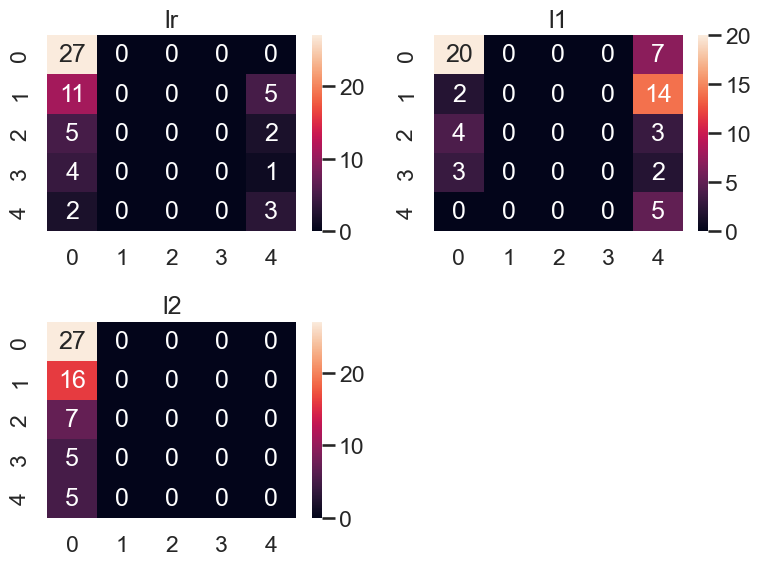

In [203]:
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(8, 6)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);
    
plt.tight_layout()